In [2]:
import matplotlib.pyplot as plt
from openpyxl import Workbook, load_workbook
import pandas as pd
import numpy as np
import xlrd
import re

In [3]:
#get all sheet names
sheet_names = []
wb = load_workbook(filename = 'UFC_rankings.xlsx')

for sheet in wb.sheetnames:
    sheet_names.append(sheet)

print(sheet_names)

mpp = pd.read_excel("UFC_rankings.xlsx", sheet_name="Men's pound-for-pound")

#get just the fighter and Record
menspp = mpp.iloc[:, 1:3]
#menspp.Record = menspp.Record.str.replace('-', ' ')

menspp_10 = menspp.head(11)
#change to Dataframe
mendf = pd.DataFrame(menspp_10)

print(mendf)


["Men's pound-for-pound", "Women's pound-for-pound", 'Heavyweight', 'Light heavyweight', 'Middleweight', 'Welterweight', 'Lightweight', 'Featherweight', 'Bantamweight', 'Flyweight', "Women's bantamweight", "Women's flyweight", "Women's strawweight"]
                  Fighter       Record
0               Jon Jones  26–1 (1 NC)
1            Kamaru Usman         18–1
2   Alexander Volkanovski         22–1
3         Israel Adesanya         20–1
4         Francis Ngannou         16–3
5          Dustin Poirier  27–6 (1 NC)
6            Stipe Miocic         20–4
7          Jan Błachowicz         28–8
8            Max Holloway         22–6
9     Deiveson Figueiredo       20–1–1
10       Robert Whittaker         23–5


In [4]:
#testing with Joghn Jones

print(menspp.iloc[0])

Fighter      Jon Jones
Record     26–1 (1 NC)
Name: 0, dtype: object


In [5]:
#adjust record values in dataframe
mendf = mendf.applymap(lambda x: re.sub("\(.*?\)", "", x))
mendf.head()

,Fighter,Record
0,Jon Jones,26–1
1,Kamaru Usman,18–1
2,Alexander Volkanovski,22–1
3,Israel Adesanya,20–1
4,Francis Ngannou,16–3


In [6]:
#bar/pie plot
figher_array = []
record = []
#assign dataframe values in its corresponding array variable
for index, row in mendf.iterrows():
    print(row["Fighter"], row["Record"])
    figher_array.append(row["Fighter"])
    record.append(row["Record"])
                                    

Jon Jones 26–1 
Kamaru Usman 18–1
Alexander Volkanovski 22–1
Israel Adesanya 20–1
Francis Ngannou 16–3
Dustin Poirier 27–6 
Stipe Miocic 20–4
Jan Błachowicz 28–8
Max Holloway 22–6
Deiveson Figueiredo 20–1–1
Robert Whittaker 23–5


In [7]:
print(figher_array)
records = [x.strip(' ') for x in record]
wins = []
losses = []
for won in records:
    wins.append(won[0:2])
print(wins)
for loss in records:
    losses.append(loss[-1])
print(losses)

['Jon Jones', 'Kamaru Usman', 'Alexander Volkanovski', 'Israel Adesanya', 'Francis Ngannou', 'Dustin Poirier', 'Stipe Miocic', 'Jan Błachowicz', 'Max Holloway', 'Deiveson Figueiredo', 'Robert Whittaker']
['26', '18', '22', '20', '16', '27', '20', '28', '22', '20', '23']
['1', '1', '1', '1', '3', '6', '4', '8', '6', '1', '5']


In [8]:
#change to integers
record_wins = [int(x) for x in wins]
record_losses = [int(x) for x in losses]

In [19]:
#no iterateors are passed
record = zip()

#Converting iterator to list
result_record = list(record)

#two iterables are passed in
record = zip(record_wins, record_losses)

# Converting iterator to set
fighter_records = list(record)
print(fighter_records[0])

(26, 1)


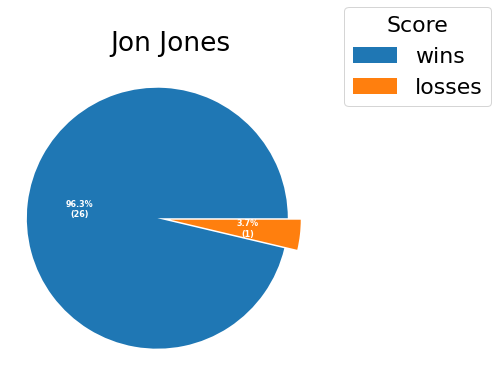

In [42]:
#Pie plot
colors = ['tab:green', 'tab:red']
explode = [0.1, 0]

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

array_score = np.asarray(fighter_records[0])
labels = ["wins", "losses"]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(array_score, autopct=lambda pct: func(pct, array_score),
                                  textprops=dict(color="w"), explode=explode)

ax.legend(wedges, labels,
          title="Score",
          loc="center left",
          bbox_to_anchor=(1, 1))
texts[0].set_fontsize(10)

plt.setp(autotexts, size=8, weight="bold")
ax.set_title(figher_array[0])


plt.show()

In [10]:
ypos = np.arange(len(figher_array))
xpos = [0, 1, 2, 3, 4, 5, 6, 7, 8]
ypos
plt.rcParams.update({'font.size': 22})

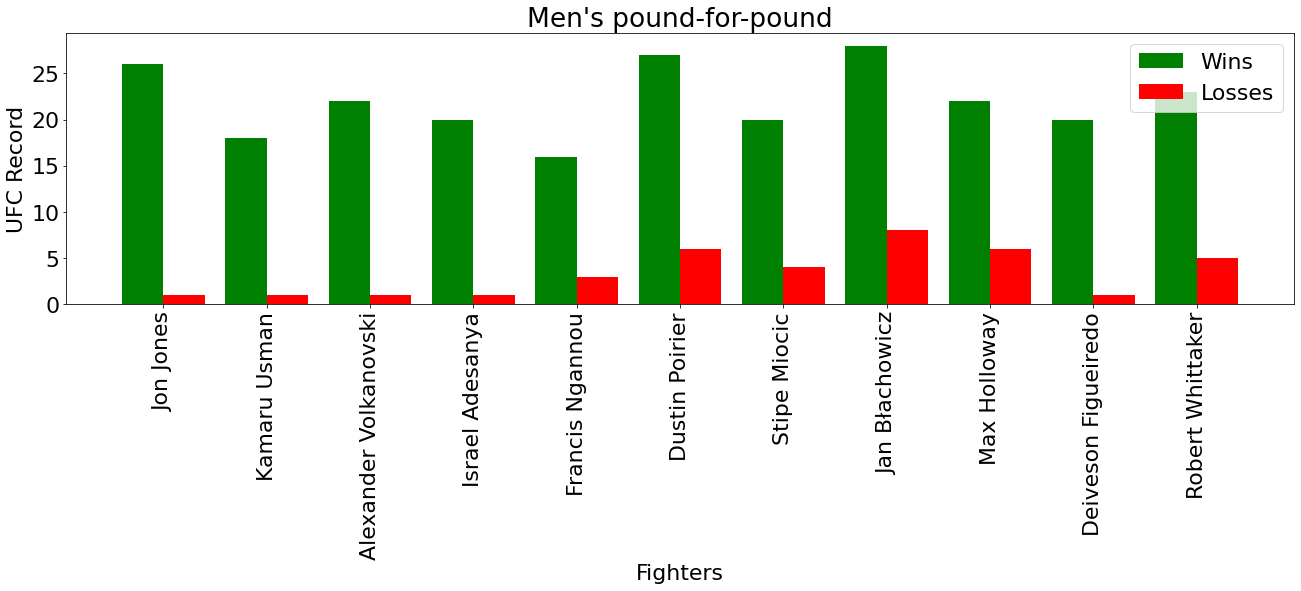

In [11]:
#bar plot
f, ax = plt.subplots(figsize=(22,5))
plt.title(sheet_names[0])
plt.xticks(rotation='vertical')
plt.xlabel("Fighters")
plt.ylabel("UFC Record")
plt.xticks(ypos, figher_array)
plt.bar(ypos - 0.2, record_wins, 0.4, label = 'Wins', color='g')
plt.bar(ypos + 0.2, record_losses, 0.4, label = 'Losses', color='r')
plt.legend()
plt.show()